# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_datasets as tfds

from skimage.morphology import binary_dilation, binary_erosion

2022-12-30 15:07:09.776949: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-30 15:07:10.307231: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-30 15:07:10.307305: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-30 15:07:12.079790: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-

# Load Data

## MNIST

In [2]:
ds_mnist = tfds.load('mnist', split='train')
df_mnist = tfds.as_dataframe(ds_mnist)
print(f'{df_mnist.shape=}')
print(f"Image shape: {df_mnist['image'][0].shape}")

2022-12-30 15:07:15.663958: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-12-30 15:07:15.664018: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (work-Aspire-A515-51G): /proc/driver/nvidia/version does not exist
2022-12-30 15:07:15.665820: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


df_mnist.shape=(60000, 2)
Image shape: (28, 28, 1)


## Fashion MNIST

In [3]:
ds_fmnist = tfds.load('fashion_mnist', split='train')
df_fmnist = tfds.as_dataframe(ds_fmnist)
print(f'{df_fmnist.shape=}')
print(f"Image shape: {df_fmnist['image'][0].shape}")

df_fmnist.shape=(60000, 2)
Image shape: (28, 28, 1)


## EMNIST

In [4]:
# Takes about 15 mins
ds_emnist = tfds.load('emnist', split='train')
df_emnist = tfds.as_dataframe(ds_emnist)
print(f'{df_emnist.shape=}')
print(f"Image shape: {df_emnist['image'][0].shape}")

df_emnist.shape=(697932, 2)
Image shape: (28, 28, 1)


# Explore images

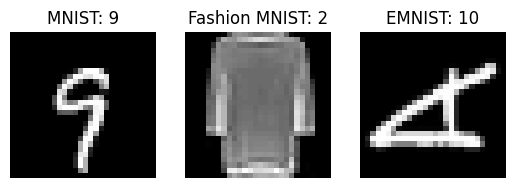

In [5]:
fig, axs = plt.subplots(ncols=3, nrows=1)

mnist = df_mnist['image'][100].squeeze()
mnist_title = df_mnist['label'][100]

fmnist = df_fmnist['image'][100].squeeze()
fmnist_title = df_fmnist['label'][100]

# The images are inverted horizontally and rotated 90 anti-clockwise
emnist = df_emnist['image'][100].squeeze()
emnist_title = df_emnist['label'][100]

axs[0].set_title(f'MNIST: {mnist_title}')
axs[0].axis('off')
axs[0].imshow(mnist, cmap='gray')

axs[1].set_title(f'Fashion MNIST: {fmnist_title}')
axs[1].axis('off')
axs[1].imshow(fmnist, cmap='gray')

axs[2].set_title(f'EMNIST: {emnist_title}')
axs[2].axis('off')
axs[2].imshow(emnist, cmap='gray')

plt.show();

# Remove labels

In [6]:
df_mnist['image'].dtype

dtype('O')

In [7]:
dfs = [df_mnist, df_fmnist, df_emnist]
arrs = []

for i in range(len(dfs)):
    arrs.append(
        np.array(
            dfs[i]['image'].tolist(),
            dtype='uint8'
        ).squeeze()
    )

arrs[0].shape

(60000, 28, 28)

# Binarize

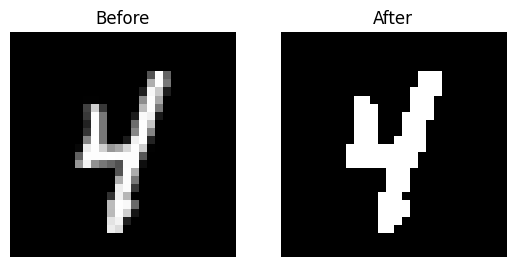

In [8]:
fig, axs = plt.subplots(ncols=2, nrows=1)

before = arrs[0][0]
after = np.where(arrs[0] > 0, 1, 0)[0]

axs[0].set_title('Before')
axs[0].axis('off')
axs[0].imshow(before, cmap='gray')

axs[1].set_title('After')
axs[1].axis('off')
axs[1].imshow(after, cmap='gray')

plt.show();

In [9]:
for i in range(len(arrs)):
    arrs[i] = np.where(arrs[i] > 0, 1, 0)

# Pattern matching :) !
arr_mnist, arr_fmnist, arr_emnist = arrs

# See results

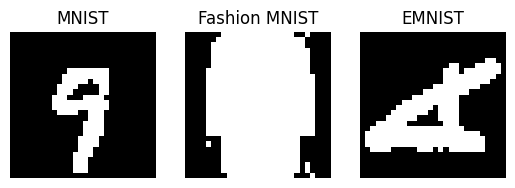

In [10]:
mnist = arr_mnist[100]
fmnist = arr_fmnist[100]
emnist = arr_emnist[100]

fig, axs = plt.subplots(ncols=3, nrows=1)

axs[0].set_title('MNIST')
axs[0].axis('off')
axs[0].imshow(mnist, cmap='gray')

axs[1].set_title('Fashion MNIST')
axs[1].axis('off')
axs[1].imshow(fmnist, cmap='gray')

axs[2].set_title('EMNIST')
axs[2].axis('off')
axs[2].imshow(emnist, cmap='gray')

plt.show();

# Sample from arrays

In [11]:
def print_batch(batch, title='Batch'):
    plt.figure(figsize=(15, 20))
    plt.title(title)
    plt.axis('off')
    
    if len(batch.shape) > 2:
        batch = np.hstack(batch)
    
    plt.imshow(batch, cmap='gray')
    


def get_batch_pics(num=10, seed=None):
    result = np.zeros((num, *arr_mnist.shape[1:]))

    np.random.seed(seed)
    arr_idxs = np.random.choice([0, 1, 2], size=num)
    pic_idxs = np.random.choice(range(df_mnist.shape[0]), size=num)

    for (i, (arr_idx, pic_idx)) in enumerate(zip(arr_idxs, pic_idxs)):
        result[i] = arrs[arr_idx][pic_idx]

    return result

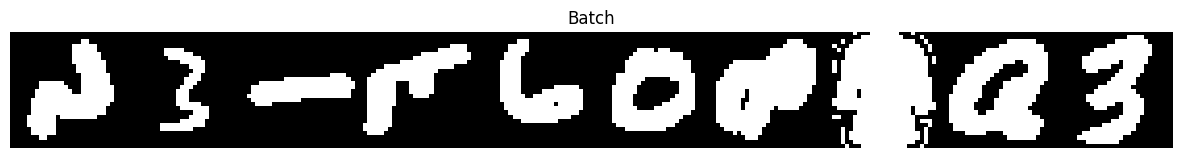

In [12]:
batch = get_batch_pics(seed=42)
print_batch(batch)

# Dilation

In [13]:
def dilate_binary(im, footprint):
    # Sadly, Python does not allow for a readable use of higher-order functions
    # list(map(lambda tup: (tup[0] // 28, tup[0] % 28), filter(lambda tup: tup[1] == 1, enumerate(batch[1].flatten()))))

    if footprint.shape[0] != footprint.shape[1] or footprint[footprint.shape[0] // 2, footprint.shape[1] // 2] != 1:
        raise ValueError('Footprint must be a square with 1 in its center!')

    im = im.astype(np.uint8)

    result = np.zeros_like(im, dtype=np.uint8)

    cols = im.shape[1]

    one_idx = [(i // cols, i % cols) for (i, val) in enumerate(im.flatten()) if val == 1]

    for (i, j) in one_idx:
        ii = i - 1
        jj = j - 1

        i_norm = (ii if ii > 0 else 0)
        j_norm = (jj if jj > 0 else 0)
        
        part = im[i_norm:ii+3, j_norm:jj+3]

        offset_i = i_norm - ii
        offset_j = j_norm - jj
        mask = footprint[offset_i : offset_i + part.shape[0], offset_j : part.shape[1]]

        result[i_norm:ii+3, j_norm:jj+3] = part | mask | result[i_norm:ii+3, j_norm:jj+3]

    return result

## Compare with `scikit-image`

In [14]:
footprint = np.array([[1, 1, 1],
                      [1, 1, 1],
                      [1, 1, 1]], dtype = np.uint8)

# Single image (square matrix)
for im in batch:
    im_scikit = binary_dilation(im, footprint)
    im_simo = dilate_binary(im, footprint)
    print(np.all(im_scikit == im_simo))

# Multiple images (non-square matrix)
tmp_batch = np.hstack(batch)
im_scikit = binary_dilation(tmp_batch, footprint)
im_simo = dilate_binary(tmp_batch, footprint)
print(np.all(im_scikit == im_simo))

# Save to files to inspect
concatted = np.concatenate([tmp_batch, im_scikit, im_simo], axis=1).astype(np.uint8)
np.savetxt("array.txt", concatted, fmt='%d', delimiter='')

True
True
True
True
True
True
True
True
True
True
True


# Erosion

In [15]:
def erode_binary(im, footprint):
    if footprint.shape[0] != footprint.shape[1] or footprint[footprint.shape[0] // 2, footprint.shape[1] // 2] != 1:
        raise ValueError('Footprint must be a square with 1 in its center!')

    im = im.astype(np.uint8)

    result = np.zeros_like(im, dtype=np.uint8)

    cols = im.shape[1]

    one_idx = [(i // cols, i % cols) for (i, val) in enumerate(im.flatten()) if val == 1]

    for (i, j) in one_idx:
        ii = i - 1
        jj = j - 1

        i_norm = (ii if ii > 0 else 0)
        j_norm = (jj if jj > 0 else 0)
        
        part = im[i_norm:ii+3, j_norm:jj+3]

        offset_i = i_norm - ii
        offset_j = j_norm - jj
        mask = footprint[offset_i : offset_i + part.shape[0], offset_j : part.shape[1]]

        if np.all(part == mask):
            result[i, j] = 1

    return result

## Compare with `scikit-image`

In [16]:
footprint = np.array([[1, 1, 1],
                      [1, 1, 1],
                      [1, 1, 1]], dtype = np.uint8)

# Single image (square matrix)
for im in batch:
    im_scikit = binary_erosion(im, footprint)
    im_simo = erode_binary(im, footprint)
    print(np.all(im_scikit == im_simo))

# Multiple images (non-square matrix)
tmp_batch = np.hstack(batch)
im_scikit = binary_erosion(tmp_batch, footprint)
im_simo = erode_binary(tmp_batch, footprint)
print(np.all(im_scikit == im_simo))

# Save to files to inspect
concatted = np.concatenate([tmp_batch, im_scikit, im_simo], axis=1).astype(np.uint8)
np.savetxt("array.txt", concatted, fmt='%d', delimiter='')

True
True
True
True
True
True
True
True
True
True
True


# Geodesic Dilation

In [17]:
def geodesic_dilation(mask, marker):
    footprint = np.array([[1, 1, 1],
                          [1, 1, 1],
                          [1, 1, 1]], dtype = np.uint8)

    result = dilate_binary(marker, footprint).astype(bool) & mask
    return result

# Geodesic Erosion

In [18]:
def geodesic_erosion(mask, marker):
    footprint = np.array([[1, 1, 1],
                          [1, 1, 1],
                          [1, 1, 1]], dtype = np.uint8)

    result = erode_binary(marker, footprint) | mask
    return result

# Morphological Reconstruction

In [19]:
mask = np.array([
    [0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0],
    [0,0,1,0,0,0,0,0,0,0],
    [0,0,1,1,0,0,0,0,0,0],
    [0,0,0,1,0,0,0,0,0,0],
    [0,0,0,1,1,1,0,0,0,0],
    [0,0,0,1,0,1,0,0,0,0],
    [0,0,0,1,1,1,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0],
])
marker = np.array([
    [0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0],
    [0,0,1,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0],
])

In [20]:
def morphological_reconstruction_dilation(mask, marker):
    step0 = marker.copy()

    while True:
        step1 = geodesic_dilation(mask, step0)
        step2 = geodesic_dilation(mask, step1)

        if np.all(step1 == step2):
            break

        step0 = step2

    return step1

In [21]:
morphological_reconstruction_dilation(mask, marker)

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

# Application 1: Remove objects specified by user

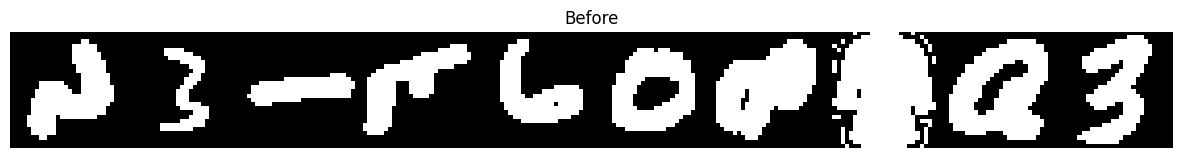

In [22]:
mask = np.hstack(batch).astype(np.uint8)
print_batch(mask, 'Before')

In [23]:
marker = np.zeros_like(mask)
marker[23, 37] = 1
marker[3, 242] = 1

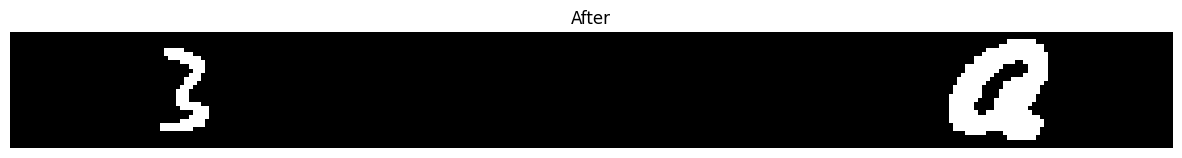

In [24]:
res = morphological_reconstruction_dilation(mask, marker)
print_batch(res, 'After')

# Application 2: Remove objects connected to border

- mask = input image
- marker = intersection between the input image and its border

The marker image contains therefore seeds for each particle connected to the image border and the reconstruction outputs the image of all these particles.

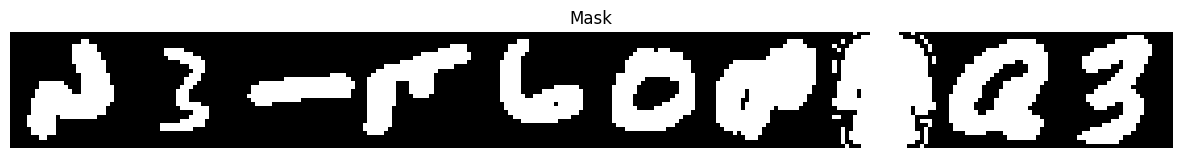

In [25]:
print_batch(mask, 'Mask')

In [26]:
marker = np.ones_like(mask)
marker[1:marker.shape[0] - 1, 1:marker.shape[1] - 1] = 0
marker = marker & mask

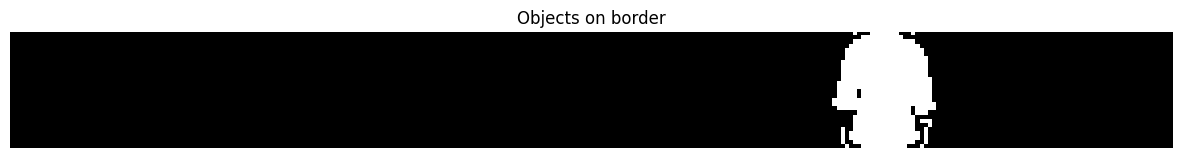

In [27]:
res = morphological_reconstruction_dilation(mask, marker)
print_batch(res, 'Objects on border')

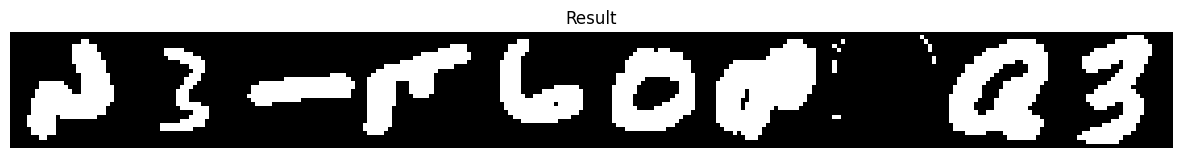

In [28]:
res = mask - res
print_batch(res, 'Result')